In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Basics


In [32]:
x = pd.Series([1,2,3,4,5])
x


0    1
1    2
2    3
3    4
4    5
dtype: int64

In [33]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [34]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [35]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [36]:
larger_than_2 = x > 2
larger_than_2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [37]:
larger_than_2.any()

True

In [38]:
larger_than_2.all()

False

In [39]:
def f(x):
    if x % 2 == 0:
        return x * 2
    else:
        return x * 3

x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

In [40]:
x.astype(np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [41]:
y = x

In [42]:
y[0]

1

In [43]:
y[0] = 100

In [44]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [45]:
x

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [46]:
y = x.copy()

In [47]:
x[0]=1

In [48]:
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [49]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

# Data frames

In [51]:
data = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(data, columns=["x"])

In [52]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [53]:
df["x"]

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [54]:
df["x"][0]

1

In [55]:
df["x_plus_2"] = df["x"] + 2
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [56]:
df["x_square"] = df["x"] ** 2
df["x_factorial"] = df["x"].apply(np.math.factorial)
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [57]:
df["is_even"] = df["x"] % 2
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,1
1,2,4,4,2,0
2,3,5,9,6,1
3,4,6,16,24,0
4,5,7,25,120,1
5,6,8,36,720,0
6,7,9,49,5040,1
7,8,10,64,40320,0
8,9,11,81,362880,1


In [58]:
df["odd_even"] = df["is_even"].map({1:"odd", 0:"even"})
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,1,odd
1,2,4,4,2,0,even
2,3,5,9,6,1,odd
3,4,6,16,24,0,even
4,5,7,25,120,1,odd
5,6,8,36,720,0,even
6,7,9,49,5040,1,odd
7,8,10,64,40320,0,even
8,9,11,81,362880,1,odd


In [59]:
df = df.drop("is_even", 1)
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


In [60]:
df[["x", "odd_even"]]

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


In [61]:
df[df["odd_even"] == "odd"]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
2,3,5,9,6,odd
4,5,7,25,120,odd
6,7,9,49,5040,odd
8,9,11,81,362880,odd


In [62]:
df[df.odd_even == "even"]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


In [64]:
df[(df.odd_even == "even") | (df.x_square < 20)]



,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


In [65]:
df[(df.odd_even == "even") & (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even


In [66]:
df[(df.odd_even == "even") & (df.x_square < 20)]["x_plus_2"][:1]

1    4
Name: x_plus_2, dtype: int64

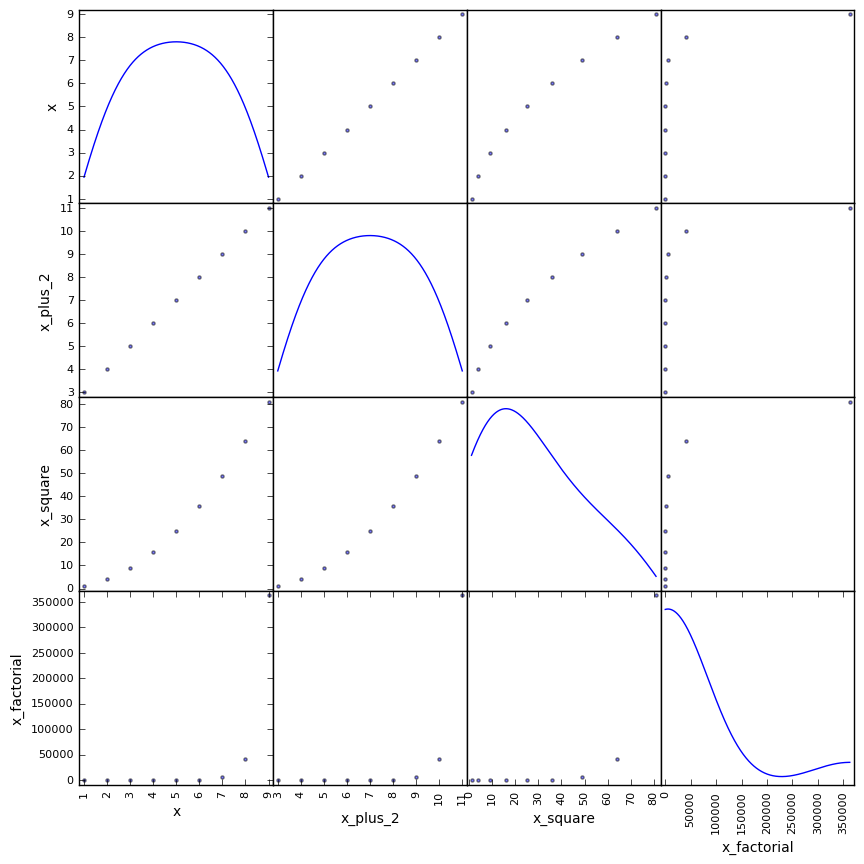

In [68]:
pd.scatter_matrix(df, diagonal="kde", figsize=(10,10));

In [69]:
df.describe()

,x,x_plus_2,x_square,x_factorial
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,7.000000,31.666667,45457.000000
std,2.738613,2.738613,28.080242,119758.341137
min,1.000000,3.000000,1.000000,1.000000
25%,3.000000,5.000000,9.000000,6.000000
50%,5.000000,7.000000,25.000000,120.000000
75%,7.000000,9.000000,49.000000,5040.000000
max,9.000000,11.000000,81.000000,362880.000000


In [70]:
url = "http://www.google.com/finance/historical?q=TADAWUL:TASI&output=csv"
stocks_data = pd.read_csv(url)

In [71]:
stocks_data

,﻿Date,Open,High,Low,Close,Volume
0,23-Apr-17,6899.00,7017.08,6899.78,6968.75,192607729
1,20-Apr-17,6948.06,6948.07,6886.39,6899.00,168467371
2,19-Apr-17,6942.38,6953.49,6916.02,6948.06,129821456
3,18-Apr-17,7011.73,7022.44,6937.38,6942.38,178835865
4,17-Apr-17,7005.40,7022.03,6993.13,7011.73,181611274
5,16-Apr-17,7076.92,7076.92,6967.97,7005.40,144389580
6,13-Apr-17,7099.13,7106.59,7067.76,7076.92,151774094
7,12-Apr-17,7036.36,7102.38,7026.54,7099.13,150442991
8,11-Apr-17,7062.17,7078.09,7032.89,7036.36,97834584
9,10-Apr-17,7058.58,7072.91,7042.15,7062.17,110122868


In [72]:
stocks_data["change_amount"] = stocks_data["Close"] - stocks_data["Open"]
stocks_data["change_percentage"] = stocks_data["change_amount"] / stocks_data["Close"]
stocks_data

,﻿Date,Open,High,Low,Close,Volume,change_amount,change_percentage
0,23-Apr-17,6899.00,7017.08,6899.78,6968.75,192607729,69.75,0.010009
1,20-Apr-17,6948.06,6948.07,6886.39,6899.00,168467371,-49.06,-0.007111
2,19-Apr-17,6942.38,6953.49,6916.02,6948.06,129821456,5.68,0.000817
3,18-Apr-17,7011.73,7022.44,6937.38,6942.38,178835865,-69.35,-0.009989
4,17-Apr-17,7005.40,7022.03,6993.13,7011.73,181611274,6.33,0.000903
5,16-Apr-17,7076.92,7076.92,6967.97,7005.40,144389580,-71.52,-0.010209
6,13-Apr-17,7099.13,7106.59,7067.76,7076.92,151774094,-22.21,-0.003138
7,12-Apr-17,7036.36,7102.38,7026.54,7099.13,150442991,62.77,0.008842
8,11-Apr-17,7062.17,7078.09,7032.89,7036.36,97834584,-25.81,-0.003668
9,10-Apr-17,7058.58,7072.91,7042.15,7062.17,110122868,3.59,0.000508


In [3]:
SALES=pd.read_csv("sample-sales.csv")
SALES.head()

,Account Number,Account Name,sku,category,quantity,unit price,ext price,date
0,803666,Fritsch-Glover,HX-24728,Belt,1,98.98,98.98,2014-09-28 11:56:02
1,64898,O'Conner Inc,LK-02338,Shirt,9,34.80,313.20,2014-04-24 16:51:22
2,423621,Beatty and Sons,ZC-07383,Shirt,12,60.24,722.88,2014-09-17 17:26:22
3,137865,"Gleason, Bogisich and Franecki",QS-76400,Shirt,5,15.25,76.25,2014-01-30 07:34:02
4,435433,Morissette-Heathcote,RU-25060,Shirt,19,51.83,984.77,2014-08-24 06:18:12


In [4]:
report = SALES.pivot_table(values=['quantity'],index=['Account Name'],columns=['category'], aggfunc=np.sum)
report.head(n=10)

quantity            
category                              Belt Shirt Shoes
Account Name                                          
Abbott PLC                             NaN   NaN  19.0
Abbott, Rogahn and Bednar              NaN  18.0   NaN
Abshire LLC                            NaN  18.0   2.0
Altenwerth, Stokes and Paucek          NaN  13.0   NaN
Ankunding-McCullough                   NaN   2.0   NaN
Armstrong, Champlin and Ratke          7.0  36.0   NaN
Armstrong, McKenzie and Greenholt      NaN   NaN   4.0
Armstrong-Williamson                  19.0   NaN   NaN
Aufderhar and Sons                     NaN   NaN   2.0
Aufderhar-O'Hara                       NaN   NaN  11.0

In [5]:
report = SALES.pivot_table(values=['quantity'],index=['Account Name'],columns=['category'], fill_value=0, aggfunc=np.sum)
report.head(n=10)

quantity            
category                              Belt Shirt Shoes
Account Name                                          
Abbott PLC                               0     0    19
Abbott, Rogahn and Bednar                0    18     0
Abshire LLC                              0    18     2
Altenwerth, Stokes and Paucek            0    13     0
Ankunding-McCullough                     0     2     0
Armstrong, Champlin and Ratke            7    36     0
Armstrong, McKenzie and Greenholt        0     0     4
Armstrong-Williamson                    19     0     0
Aufderhar and Sons                       0     0     2
Aufderhar-O'Hara                         0     0    11

In [6]:
report = SALES.pivot_table(values=['ext price','quantity'],index=['Account Name'],columns=['category'], fill_value=0,aggfunc=np.sum)
report.head(n=10)

ext price                 quantity        \
category                               Belt   Shirt   Shoes     Belt Shirt   
Account Name                                                                 
Abbott PLC                             0.00    0.00  755.44        0     0   
Abbott, Rogahn and Bednar              0.00  615.60    0.00        0    18   
Abshire LLC                            0.00  720.18   90.34        0    18   
Altenwerth, Stokes and Paucek          0.00  843.31    0.00        0    13   
Ankunding-McCullough                   0.00  132.30    0.00        0     2   
Armstrong, Champlin and Ratke        587.30  786.73    0.00        7    36   
Armstrong, McKenzie and Greenholt      0.00    0.00  125.04        0     0   
Armstrong-Williamson                1495.87    0.00    0.00       19     0   
Aufderhar and Sons                     0.00    0.00  193.54        0     0   
Aufderhar-O'Hara                       0.00    0.00  669.57        0     0   

                                         
category                          Shoes  
Account Name                             
Abbott PLC                           19  
Abbott, Rogahn and Bednar             0  
Abshire LLC                           2  
Altenwerth, Stokes and Paucek         0  
Ankunding-McCullough                  0  
Armstrong, Champlin and Ratke         0  
Armstrong, McKenzie and Greenholt     4  
Armstrong-Williamson                  0  
Aufderhar and Sons                    2  
Aufderhar-O'Hara                     11

In [7]:
report.to_excel('report.xlsx', sheet_name='Sheet1')

# Descriptions


In [9]:
sales=pd.read_csv("sample-salesv2.csv",parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [10]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [11]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

In [12]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

# Plotting

In [13]:
customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


In [15]:
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

In [16]:
sales_totals = customer_group.sum()
sales_totals.sort(columns='ext price').head()

/Users/shift/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,ext price
name,
"Davis, Kshlerin and Reilly",19054.76
Huel-Haag,21087.88
Gorczany-Hahn,22207.90
Hamill-Hackett,23433.78
Heidenreich-Bosco,25428.29


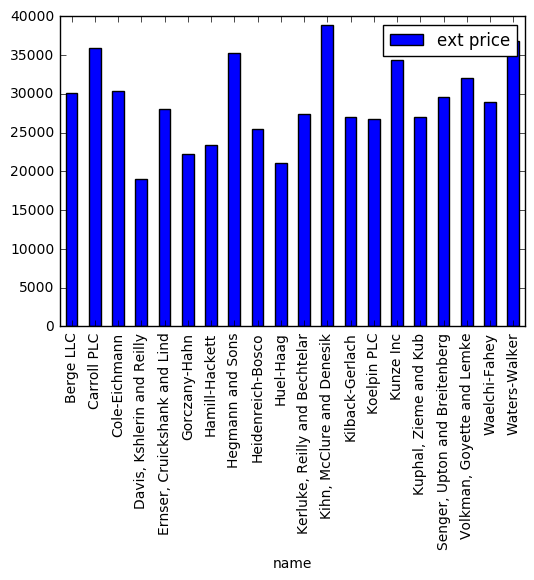

In [17]:
my_plot = sales_totals.plot(kind='bar')

/Users/shift/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


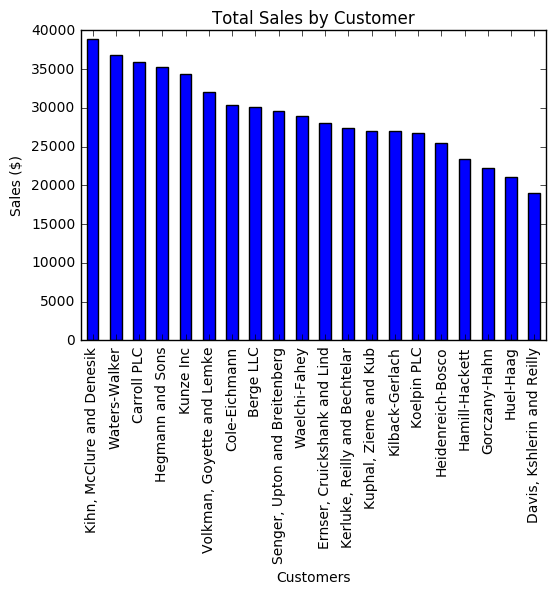

In [18]:
my_plot = sales_totals.sort(columns='ext price',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

In [19]:
customers = sales[['name','category','ext price','date']]
customers.head()

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:24
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:27


In [20]:
category_group=customers.groupby(['name','category']).sum()
category_group.head()


ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61

In [21]:
category_group.unstack().head()

ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

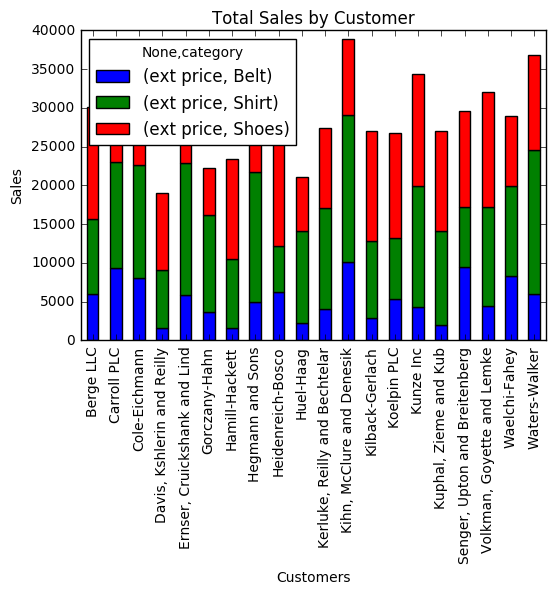

In [22]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

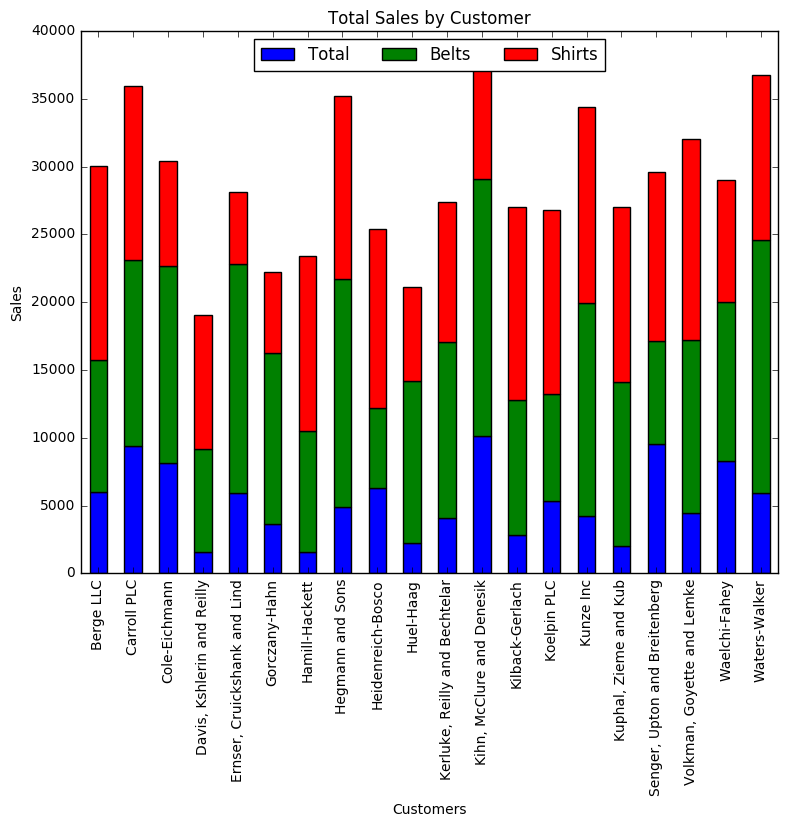

In [23]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)

In [24]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


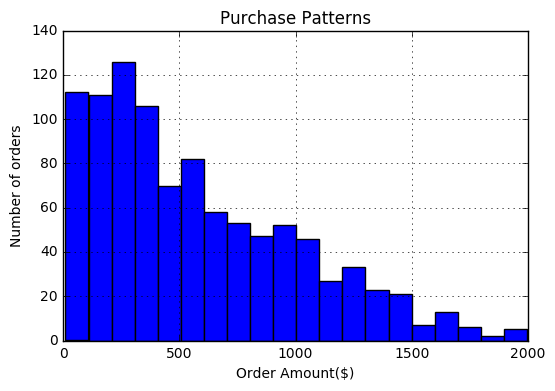

In [25]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

In [26]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


In [27]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-09-27 07:13:03,578.24
2014-07-29 02:10:44,1018.78
2014-03-01 10:51:24,289.92
2013-11-17 20:41:11,413.40
2014-01-03 08:14:27,1793.52


In [28]:
purchase_patterns.resample('M',how=sum)


/Users/shift/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


,ext price
date,
2013-10-31,14085.27
2013-11-30,44932.78
2013-12-31,57752.23
2014-01-31,53161.35
2014-02-28,51783.56
2014-03-31,44991.85
2014-04-30,34098.05
2014-05-31,50001.02
2014-06-30,37477.65


/Users/shift/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


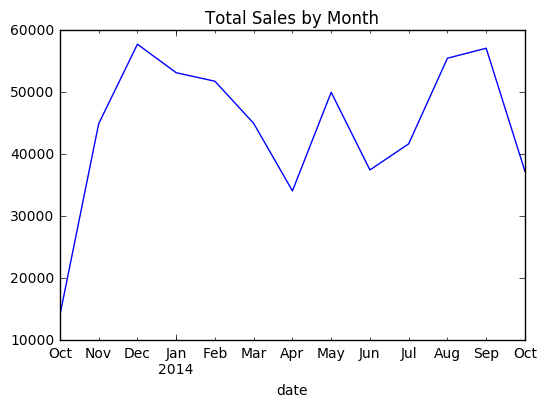

In [29]:
purchase_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None)

In [30]:
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")